# Introduction

COVID-19, also known as the coronavirus was declared as a global pandemic by the World Health Organization on March 11, 2020. The first known case occurred in mid-November and the first confirmed death occured mid-January. This may not be accurate due to numerous cases being labelled as influenza or pneumonia as a direct result of lack of testing and censorship by the Government of China. Unfortunately, COVID-19 has spread throughout the world with 1.7 million confirmed cases and 100,000 confirmed deaths at the time of writing. While there is little we can do about the past, we can look towards the future. Our analysis will aim to determine when the rate of increase in COVID-19 cases will start its decline.

Despite the fact that the coronvirus outbreak originated in Wuhan, China, the increase in the number of cases have declined for the country as a whole. There is a lot of uncertainty about how vastly underreported their numbers are, especially as some experts estimate there could be 40 times their current reported cases. However, this is the data we have and we can use China's cases to try and estimate when the increase in the number of cases in Canada will begin to slow if we follow proper social distancing and self-isolation protocols.

# Methods

Historically, epidemics and pandemics tend to follow a logistic growth pattern. The number of cases starts off small, then we see an exponential increase which eventually starts to slow down and reach a plateau. This is the pattern of a sigmoid. The formula for logistic growth is:

\begin{equation} \label{eq:1}
y(t) = \frac{c}{1 + a \cdot e^{-bt}}
\end{equation}

Where y(t) is the number of cases at a time t, c is the maximum number of cases , a and b are constants that can be modified (b > 0). Also note that the maximum growth rate occurs at t = ln(a)/b, y(t) = c/2.

With this information we can figure out the number of days it took China to reach the maximum growth rate inflection point. We also know that this point represents half of the maximum number of cases. We can then compare this logistic model to Canada's cases, and estimate the time lag between Canada and China. The next step is to use an exponential model to extrapolate the data in Canada until we reach the maximum growth rate. Then we can estimate the maximum number of cases, or at least have a number where we think we will reach a plateau.

Exponential growth takes the form of:

\begin{equation} \label{eq:2}
y(t) = y_0 \cdot b^t
\end{equation}

Where x(t) is the number of cases at a time t, $y_0$ is the initial value, b is the growth factor (number of people infected per infected individual).

# Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import datetime

covid = pd.read_csv('full_data.csv')
covid['date'] =  pd.to_datetime(covid['date'])
canada = covid.loc[covid['location']=='Canada'].reset_index()
china = covid.loc[covid['location']=='China'].reset_index()

In [2]:
def logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

t = np.arange(0,len(china),1)
y = np.array(china['total_cases'])
#p0 = np.random.exponential(size=3)
(a,b,c), cov = opt.curve_fit(logistic,t,y)
print([a,b,c])
max_growth_t = np.log(a)/b
#max_growth_y = c/2
max_growth_y = logistic(max_growth_t,a,b,c)
print(max_growth_t.round(),'days,',max_growth_y.round(),'cases')
print('date:',china['date'][40])

[7466.835022288715, 0.22070808322705104, 81683.50258532478]
40.0 days, 40842.0 cases
date: 2020-02-09 00:00:00


C:\Users\dangk\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


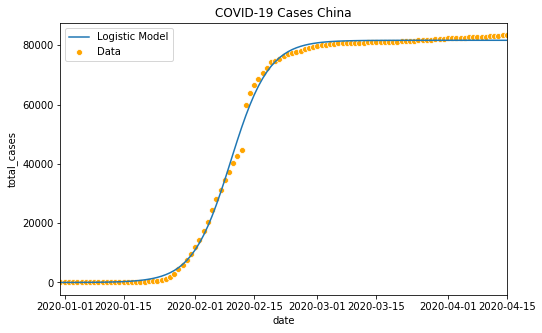

In [3]:
plt.figure(figsize=(8,5))
sns.scatterplot(china['date'],china['total_cases'],color='orange',label='Data')
sns.lineplot(china['date'],logistic(t,a,b,c),label='Logistic Model')
plt.xlim(min(china['date']),max(china['date']))
plt.title('COVID-19 Cases China')
plt.show()

The logistic model in Figure 1 has the following coefficients from equation 1: $a = 7467, b = 0.2207, c = 81684$. Plugging them into the equation, we get:
\begin{equation} \label{eq:3}
y(t) = \frac{81684}{1 + 7467 \cdot e^{-0.2207t}}
\end{equation}

From equation 3, we know that the max growth rate of cases in China occurs at $t = \ln(a)/b = \ln(7467)/0.2207 \approx 40$ days, or on February 9, 2020. On this date, the model interpolates the number of cases as 40,842.

In [4]:
china[china['total_cases'] > c]

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
86,2154,2020-03-26,China,102,6,81733,3291
87,2155,2020-03-27,China,94,5,81827,3296
88,2156,2020-03-28,China,119,3,81946,3299
89,2157,2020-03-29,China,113,5,82059,3304
90,2158,2020-03-30,China,98,2,82157,3306
91,2159,2020-03-31,China,84,3,82241,3309
92,2160,2020-04-01,China,54,1,82295,3310
93,2161,2020-04-02,China,100,6,82395,3316
94,2162,2020-04-03,China,70,10,82465,3326
95,2163,2020-04-04,China,62,4,82527,3330


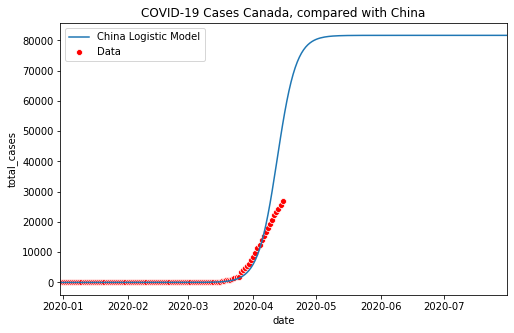

In [5]:
date = canada['date'].append(canada['date']+pd.DateOffset(days=len(canada)))
plt.figure(figsize=(8,5))
sns.scatterplot(canada['date'],canada['total_cases'],color='red',label='Data')
sns.lineplot(date,logistic(np.arange(0,len(date),1)-63,a,b,c),label='China Logistic Model')
plt.xlim(min(date),max(date))
plt.title('COVID-19 Cases Canada, compared with China')
plt.show()

We note from Figure 2 that there is approximately a 63 day delay - Canada did not report their first case until 26 days after data was collected, and the acceleration began much later (about 37 days to yield a 63 day shift). This 63 day shift does not fit the Canada data points well, but it is a helpful guide to estimate the length of the delay.

In [6]:
def exponential(t,a,b):
    return a*(b**t)

t = np.arange(0,len(canada),1)
y = np.array(canada['total_cases'])
popt, pcov = opt.curve_fit(exponential,t,y)
print(popt)

[1.1773332  1.10066615]


The exponential equation is:
$$y(t) = 1.177 \cdot 1.101^t$$

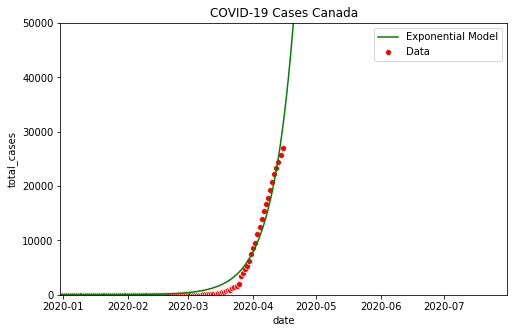

In [7]:
date = canada['date'].append(canada['date']+pd.DateOffset(days=len(canada)))
plt.figure(figsize=(8,5))
sns.scatterplot(canada['date'],canada['total_cases'],color='red',label='Data')
sns.lineplot(date,exponential(np.arange(0,len(date),1),*popt),color='green',label='Exponential Model')
plt.xlim(min(date),max(date))
plt.ylim(0,50000)
plt.title('COVID-19 Cases Canada')
plt.show()

In [8]:
# 63 day delay, and 40 days to peak: Total cases at 22133.
maxgrowthday = 103 # actually 104th day since python indices start at 0
#maxgrowthcases = canada.loc[maxgrowthday,:]['total_cases']
maxgrowthcases = exponential(maxgrowthday,*popt)
estimatedmaxcases = maxgrowthcases*2
print('date:',canada.loc[maxgrowthday,:]['date'],'cases:',maxgrowthcases.round())
print('Projected Max Cases:',estimatedmaxcases.round())

date: 2020-04-12 00:00:00 cases: 22984.0
Projected Max Cases: 45968.0


The exponential model in Figure 3 has the coefficients $y_0 = 1.177, b = 1.101$. \newline Equation 2 can be filled in as:

\begin{equation}
y(t) = 1.177 \cdot 1.101^t
\end{equation} 

If Canada's cases were to reach the peak around the same time as China but with the 63 day lag, that means the maximum growth rate would occur at $t = 40+63 = 103$ days (April 12). The exponential model gives the number of cases y(t) as 22,984. Now if we were to extrapolate the data points, using a logistic model then we expect the value of $c$ from equation 1 to be twice that of 22,984, which is 45,968. This would represent the upper bound of cases in Canada given by the model. This is not a hard limit however, as we note from China's graph that some data points did go over, but it is a good guide for estimating when we will see a plateau.

Cases in China surpassed the theoretical upper bound of $c = 81684$ on March 26, which is 46 days after their maximum growth rate date of February 9. If Canada follows the same social distancing and self isolation protocols as China, then the theoretical upper limit of cases in Canada may be reached on May 28.

# Discussion

Using a logistic model for China we determined the date on which the maximum growth rate in COVID-19 cases occurred. The total cases recorded on February 9 is about half of their current reported cases. Applying this principle to Canada, we estimated that the peak growth rate occured on April 12 (roughly 23,000 cases), so we expect that the upper bound of cases will be about 46,000 on May 28.

The main limitations of this analysis is that we cannot control for unexpected scenarios. We do not know when the government will decide to reopen more businesses and schools, or whether there are enough tests being administered. There is expected to be a large margin of error, but perhaps we can get a good look into the future about 6 weeks from the time of writing. 